In [1]:
# importing packages
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import sklearn 
import os,pickle

In [2]:
# Data loading
df = pd.read_csv(r'D:\SHRDC\Assesment 3 Classification\ecommerceDataset.csv')

In [3]:
df.columns

Index(['Household', 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and s

In [4]:
# Rename the second column
df.rename(columns={df.columns[1]: 'Product_Description'}, inplace=True)

# Verify the column names after renaming
print(df.columns)

Index(['Household', 'Product_Description'], dtype='object')


In [5]:
# Data inspection
print('Shape of the data: ',df.shape)
print('Data info:\n  ',df.info())
print('Data description:\n ',df.describe().transpose())
print('Example data:\n ',df.head(1))

Shape of the data:  (50424, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Household            50424 non-null  object
 1   Product_Description  50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
Data info:
   None
Data description:
                       count unique  \
Household            50424      4   
Product_Description  50423  27801   

                                                                   top   freq  
Household                                                    Household  19312  
Product_Description  Think & Grow Rich About the Author NAPOLEON HI...     30  
Example data:
     Household                                Product_Description
0  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...


In [6]:
# Data Cleaning
print(df.isna().sum())
print('--------------------')
print(df.duplicated().sum())

Household              0
Product_Description    1
dtype: int64
--------------------
22622


In [7]:
# Drop rows with missing values in the 'Product_Description' column
df = df.dropna(subset=['Product_Description'])

In [8]:
print(df.isna().sum())

Household              0
Product_Description    0
dtype: int64


In [9]:
# Data preprocessing
# Split the data info features and labels
features = df['Product_Description'].values 
labels = df['Household'].values

In [10]:
# Convert the categorical label into integer - label encoding 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [11]:
# Perform train test split
from sklearn.model_selection import train_test_split
seed = 42
X_train,X_test,y_train,y_test = train_test_split(features,labels_encoded,train_size=0.8,random_state=seed)

In [12]:
# Process the input texts
#(A) Tokenization
#Define parameters for the following process
vocab_size = 20000
oov_token = '<OOV>'
max_length = 200
embedding_dim = 64

#(B) Define the Tokenizer object
tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocab_size,split=' ',oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [13]:
word_index = tokenizer.word_index
print(dict(list(word_index.items())[0:10]))

{'<OOV>': 1, 'the': 2, 'and': 3, 'of': 4, 'to': 5, 'a': 6, 'for': 7, 'in': 8, 'with': 9, 'is': 10}


In [14]:
#(C) Transform texts into tokens
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [15]:
#(D)Perform padding
X_train_padded = keras.utils.pad_sequences(X_train_tokens,maxlen=max_length,padding='post',truncating='post')
X_test_padded = keras.utils.pad_sequences(X_test_tokens,maxlen=max_length,padding='post',truncating='post')

In [16]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

def decode_tokens(tokens):
    return ' '.join([reverse_word_index.get(i, '?') for i in tokens])

print(X_train_padded[2])
print('-----------------------')
print(decode_tokens(X_train_padded[2]))

[14712  1542  4579  7452  1021   378 14712  4579  7452  1542  1055  1021
     9  5826  1690   573   679   673   290  4842  1021     3  1332   192
   290 14712    26    88     6   248  4579  7452    16    31   241    12
    24  1185  5972   756   874    14  7452    26   112  2532    88     7
     2     1    38     5    37 12336  1055    62 10741     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [17]:
# Model development
#(A) Create a sequential model, then start with embedding layer
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,embedding_dim))
#(B) Build RNN model, use bidirectional LSTM
model.add(keras.layers.Bidirectional(keras.layers.LSTM(48)))
model.add(keras.layers.Dropout(0.5))  # Add dropout layer
model.add(keras.layers.Dense(48, activation='relu'))
model.add(keras.layers.Dropout(0.5))  # Add dropout layer
model.add(keras.layers.Dense(len(np.unique(labels)), activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 96)                43392     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense (Dense)               (None, 48)                4656      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 196       
                                                       

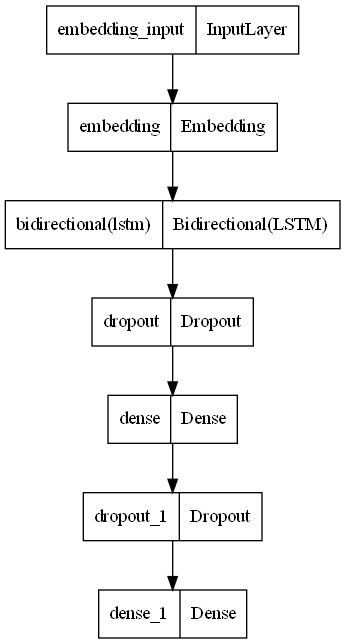

In [34]:
keras.utils.plot_model(model)

In [18]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
# Callbacks
import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
max_epoch = 20
early_stopping = keras.callbacks.EarlyStopping(patience=3)
PATH = os.getcwd()
logpath = os.path.join(PATH, "tensorboard_log",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = TensorBoard(logpath)

In [20]:
# Model training
history = model.fit(X_train_padded,y_train,validation_data=[X_test_padded,y_test],
                    epochs=max_epoch,callbacks=[early_stopping,tb],batch_size=32)

Epoch 1/20


1261/1261 [==============================] - 119s 90ms/step - loss: 0.2931 - accuracy: 0.9056 - val_loss: 0.0980 - val_accuracy: 0.9739
Epoch 2/20
1261/1261 [==============================] - 111s 88ms/step - loss: 0.0749 - accuracy: 0.9827 - val_loss: 0.1055 - val_accuracy: 0.9744
Epoch 3/20
1261/1261 [==============================] - 115s 91ms/step - loss: 0.0440 - accuracy: 0.9896 - val_loss: 0.1033 - val_accuracy: 0.9782
Epoch 4/20
1261/1261 [==============================] - 113s 89ms/step - loss: 0.0282 - accuracy: 0.9929 - val_loss: 0.1066 - val_accuracy: 0.9778


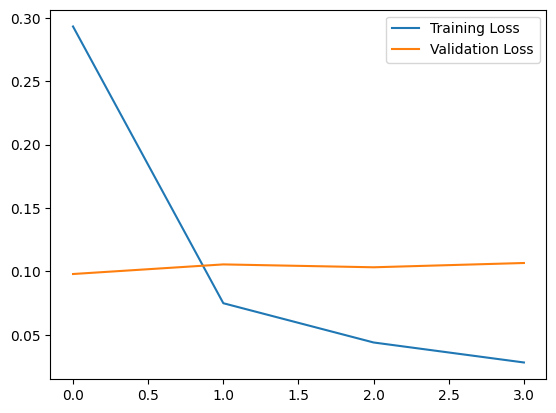

In [21]:
#Plot graph to display training result
#(A) Loss graph
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

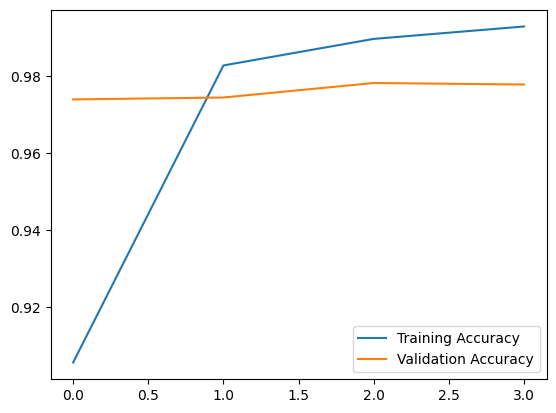

In [22]:
#(B) Accuracy graph
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

# Assuming model.predict returns predicted labels
y_pred_train = model.predict(X_train_padded)
y_pred_val = model.predict(X_test_padded)

# Convert predicted probabilities to labels
y_pred_train_labels = np.argmax(y_pred_train, axis=1)
y_pred_val_labels = np.argmax(y_pred_val, axis=1)

# Print classification report for training set
print("Classification Report (Training Set):\n", classification_report(y_train, y_pred_train_labels))

# Print classification report for validation set
print("Classification Report (Validation Set):\n", classification_report(y_test, y_pred_val_labels))

# Print confusion matrix for validation set
print("Confusion Matrix (Validation Set):\n", confusion_matrix(y_test, y_pred_val_labels))

316/316 [==============================] - 6s 19ms/step
Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      9485
           1       0.99      1.00      1.00      6911
           2       0.99      1.00      1.00      8509
           3       1.00      1.00      1.00     15433

    accuracy                           1.00     40338
   macro avg       1.00      1.00      1.00     40338
weighted avg       1.00      1.00      1.00     40338

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2335
           1       0.98      0.98      0.98      1759
           2       0.97      0.97      0.97      2112
           3       0.98      0.98      0.98      3879

    accuracy                           0.98     10085
   macro avg       0.98      0.98      0.98     10085
weighted avg       0.98      0.98      0.98     1

In [35]:
#12. Model deployment
#(A) Get an example input 
test_string = r" Introducing our captivating Story Book, a literary masterpiece that transcends age boundaries. Immerse yourself in a world of enchanting tales, where imagination knows no limits"

#(B) Convert the text into tokens
test_tokens = tokenizer.texts_to_sequences(test_string)

In [36]:
#Remove Nan values
def remove_space(token):
    temp = []
    for i in token:
        if i!=[]:
            temp.append(i[0])
    return temp

test_token_processed = np.expand_dims(np.array(remove_space(test_tokens)), axis=0)

In [37]:
#(C) Perform padding and truncating
test_token_padded = keras.preprocessing.sequence.pad_sequences(test_token_processed,maxlen=max_length,
                                                               padding='post', truncating='post')

In [38]:
#(D) Perform prediction using the model
y_pred = np.argmax(model.predict(test_token_padded))

1/1 [==============================] - 0s 55ms/step


In [39]:
#(E) Use label encoder to find the class
class_prediction = label_encoder.inverse_transform(y_pred.flatten())
print(class_prediction)

['Books']


In [29]:
# Save important components so that we can deploy the NLP model in other aplications
#(A) Tokenizer
os.chdir(r"D:\SHRDC\Assesment 3 Classification\assesment3\ProductCato")
PATH = os.getcwd()
print(PATH)

d:\SHRDC\Assesment 3 Classification\assesment3\ProductCato


In [30]:
tokenizer_save_path = os.path.join(PATH,"tokenizer.pkl")
with open(tokenizer_save_path,"wb") as f:
    pickle.dump(tokenizer,f)

In [31]:
#(B) Label encoder 
label_encoder_save_path = os.path.join(PATH,"label_encoder.pkl")
with open(label_encoder_save_path,'wb') as f:
    pickle.dump(label_encoder,f)

In [32]:
#(C) Save the Keras model
model_save_path = os.path.join(PATH, "nlp_model")
keras.models.save_model(model,model_save_path)

INFO:tensorflow:Assets written to: d:\SHRDC\Assesment 3 Classification\assesment3\ProductCato\nlp_model\assets


INFO:tensorflow:Assets written to: d:\SHRDC\Assesment 3 Classification\assesment3\ProductCato\nlp_model\assets


In [33]:
# Save in json format
import json

tokenizer_save_path = os.path.join(PATH, "tokenizer.json")

# Serialize the tokenizer to a JSON-formatted string
tokenizer_json = tokenizer.to_json()

# Save the JSON-formatted string to a file
with open(tokenizer_save_path, "w", encoding="utf-8") as json_file:
    json_file.write(tokenizer_json)
